### Importing the required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a DataFrame

In [40]:
# Creating a DataFrame with the given dataset.
movie_data = pd.read_csv(r'movie_dataset.csv')
movie_data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [145]:
# Droping the unwanted column.
movie_data.drop('Unnamed: 0',inplace = True, axis=1)

In [11]:
movie_data.shape

(918, 10)

In [13]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       918 non-null    object
 1   Movie Info                  918 non-null    object
 2   Distributor                 918 non-null    object
 3   Release Date                800 non-null    object
 4   Domestic Sales (in $)       918 non-null    int64 
 5   International Sales (in $)  918 non-null    int64 
 6   World Sales (in $)          918 non-null    int64 
 7   Genre                       918 non-null    object
 8   Movie Runtime               918 non-null    object
 9   License                     744 non-null    object
dtypes: int64(3), object(7)
memory usage: 71.8+ KB


In [15]:
movie_data.describe()

,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,9.180000e+02,9.180000e+02,9.180000e+02
mean,1.677469e+08,2.301434e+08,3.968668e+08
std,1.040360e+08,2.176011e+08,3.082629e+08
min,8.036084e+07,2.600000e+02,8.160000e+07
25%,1.016071e+08,8.845620e+07,2.005564e+08
50%,1.321351e+08,1.638819e+08,3.019416e+08
75%,1.913905e+08,2.885577e+08,4.750718e+08
max,9.366622e+08,2.086739e+09,2.847246e+09


In [17]:
movie_data.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

### Data Cleaning

In [41]:
# Replaced DreamWorks Distribution to DreamWorks.
movie_data['Distributor']=movie_data['Distributor'].apply(lambda x: x.replace('DreamWorks Distribution','DreamWorks') 
                                                          if 'DreamWorks Distribution' in x else x)

In [42]:
#Rated G: General audiences – All ages admitted
#Rated PG: Parental guidance suggested – Some material may not be suitable for children.
#Rated PG-13: Parents strongly cautioned – Some material may be inappropriate for children under 13.
#Rated R: Restricted – Under 17 requires accompanying parent or adult guardian.
# Replaced NAN values using pad method --> this makes forward fill the values.
movie_data['License']= movie_data['License'].pad()

In [43]:
# After removing NaN values from License column, checking for null values.
movie_data.isnull().sum()

Unnamed: 0                      0
Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                         0
dtype: int64

### Treating NaN values from Release Date column

In [44]:
movie_data['Release Date']

0      December 16, 2015
1         April 24, 2019
2      December 16, 2009
3                    NaN
4                    NaN
             ...        
913        June 25, 2004
914    December 21, 2001
915      August 13, 2010
916     October 17, 2003
917         July 6, 2011
Name: Release Date, Length: 918, dtype: object

In [45]:
# Taking all the NaN values from the Release date column.
NaN_values = movie_data['Release Date'][movie_data['Release Date'].isnull()]

In [46]:
# Checking whether there is any non null value present in the data.
NaN_values =list(NaN_values)
print(NaN_values)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [47]:
# Taking all the titles which are having release date as null and assigning in to titles_release_date.
titles_release_date= movie_data['Title'][movie_data['Release Date'].isnull()]

In [48]:
# Converting the titles_release_date into a list, so that we can slice the list for release date.
titles_release_date= list(titles_release_date)
print(titles_release_date)

['Black Panther (2018)', 'Avengers: Infinity War (2018)', 'Spider-Man: No Way Home (2021)', 'Incredibles 2 (2018)', 'Finding Dory (2016)', 'Harry Potter and the Deathly Hallows: Part 2 (2011)', 'Zootopia (2016)', 'Aquaman (2018)', 'The Hobbit: An Unexpected Journey (2012)', 'Harry Potter and the Deathly Hallows: Part 1 (2010)', 'Monsters University (2013)', 'The Hobbit: The Desolation of Smaug (2013)', 'The Hobbit: The Battle of the Five Armies (2014)', 'Night at the Museum (2006)', 'Moana (2016)', 'The Exorcist (1973)', 'Justice League (2017)', 'Shang-Chi and the Legend of the Ten Rings (2021)', 'National Treasure: Book of Secrets (2007)', 'Ant-Man and the Wasp (2018)', 'Venom: Let There Be Carnage (2021)', 'Coco (2017)', 'The Amazing Spider-Man 2 (2014)', 'Madagascar (2005)', 'Sherlock Holmes: A Game of Shadows (2011)', 'Snow White and the Seven Dwarfs (1937)', 'The Fugitive (1993)', 'Black Widow (2021)', 'Liar Liar (1997)', 'The Boss Baby (2017)', 'Apollo 13 (1995)', 'Home Alone 2: 

In [49]:
# Taking all the release dates present in the title column.
Release_date = []
for i in range(0,118):
    n = len(titles_release_date[i])
    Release_date.append(titles_release_date[i][n-5:n-1])
print(Release_date)

['2018', '2018', '2021', '2018', '2016', '2011', '2016', '2018', '2012', '2010', '2013', '2013', '2014', '2006', '2016', '1973', '2017', '2021', '2007', '2018', '2021', '2017', '2014', '2005', '2011', '1937', '1993', '2021', '1997', '2017', '1995', '1992', '2021', '2007', '2021', '2021', '2020', '1993', '2006', '2017', '2015', '1989', '1998', '2008', '1995', '1998', '1992', '1997', '1996', '2017', '1985', '1998', '1997', '2021', '2000', '1996', '2015', '1992', '2021', '2007', '2007', '2021', '2021', '1986', '1996', '1995', '2021', '1993', '1995', '2003', '1996', '1996', '2006', '1994', '1992', '1993', '2021', '2018', '1995', '2007', '1996', '2008', '1977', '2009', '1955', '1997', '2021', '1994', '2017', '1996', '1995', '2014', '2001', '2007', '2009', '1996', '2005', '1992', '1953', '2012', '2021', '2015', '2011', '1981', '1986', '1995', '2006', '2004', '1998', '1992', '1979', '2018', '2011', '2005', '1995', '2007', '1970', '1995']


In [50]:
# Creating a pandas series from title date as release date with NaN values index.
Release_date_1 =pd.Series(Release_date,index=movie_data[movie_data['Release Date'].isnull()].index)
Release_date_1

3      2018
4      2018
5      2021
10     2018
16     2016
       ... 
890    2005
891    1995
896    2007
903    1970
912    1995
Length: 118, dtype: object

In [51]:
# fill all the NaN values in Release Date column. 
movie_data['Release Date'] = movie_data['Release Date'].fillna(Release_date_1)

In [52]:
movie_data['Release Date']

0      December 16, 2015
1         April 24, 2019
2      December 16, 2009
3                   2018
4                   2018
             ...        
913        June 25, 2004
914    December 21, 2001
915      August 13, 2010
916     October 17, 2003
917         July 6, 2011
Name: Release Date, Length: 918, dtype: object

In [53]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                918 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     918 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


In [166]:
movie_data.isnull().sum()

Title                         0
Movie Info                    0
Distributor                   0
Release Date                  0
Domestic Sales (in $)         0
International Sales (in $)    0
World Sales (in $)            0
Genre                         0
Movie Runtime                 0
License                       0
dtype: int64

In [ ]:
# movie_data.to_csv('cleaned_movie_data.csv')

### Data Visualization

In [55]:
High_Domestic_sales = movie_data[movie_data['Domestic Sales (in $)']>=600000000]

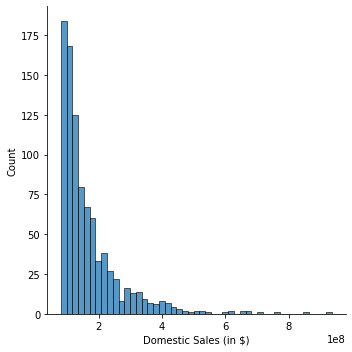

In [56]:
sns.displot(data=movie_data, x='Domestic Sales (in $)')

<li>The domestic sales(in $) is having 125 to 175 count tells the number of movies having thier sales below 200 Million and the domestic sales is decreasing when comes to higher sales, but there are very less sales between 400 Million to 900 Million.</li><li>These range of sales are having very high sales and the number of movies are very less.</li>

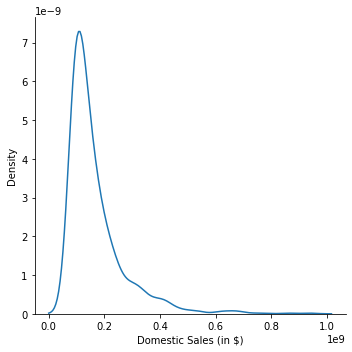

In [165]:
sns.displot(data=movie_data, x='Domestic Sales (in $)', kind='kde')

<li>The kde plot on Domestic sales tells us that it looks like a bell shape curve called Normal Disribution but there are some outliers effecting the plot towards right hand side so, the the kde plot is a Right squed plot.</li>
<li>The average domestic sales is having near to 1.67 Million and the maximum domestic sales(in $) is having nearer to 1.0 Billion and it is an outlier that effects the data.</li>

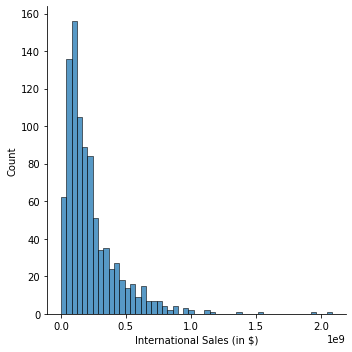

In [58]:
sns.displot(data=movie_data, x='International Sales (in $)')
plt.show()

<li> International sales for all the movies sales and thier count is nearer to 160, here more sales are in the range of 0.5 Billion and there are very few sales ranging between 1.0 to 2.0 Billion.</li>

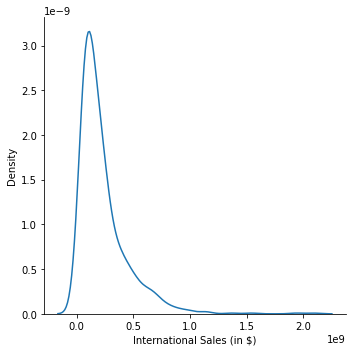

In [59]:
sns.displot(data=movie_data, x='International Sales (in $)', kind = 'kde')
plt.show()

<li> The Kde for International sales shows that it is looks like a normal distributed curve but, some outliers are effecting towards right hand side so it is a right squed plot.</li>
<li> The average mean values in international sales is having nearer to 0.2 Billion and mode attracts towards right side of higher sales</li>

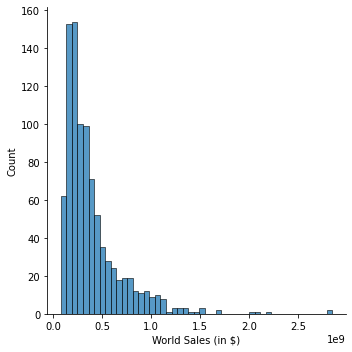

In [60]:
sns.displot(data=movie_data, x='World Sales (in $)')
plt.show()

<li>The world sales of hist plot shows that the sales of more movies are having in the range of 0.1 to 0.2 Bilion with the count of 155 and very few sales are having sales at higher and their count is very less.</li>

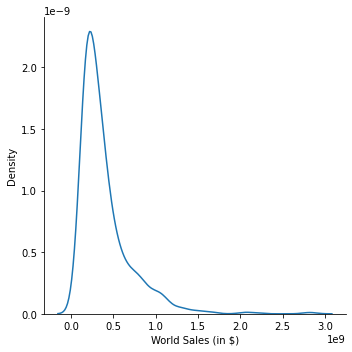

In [61]:
sns.displot(data=movie_data, x='World Sales (in $)', kind = 'kde')
plt.show()

<li> The density plot for World sales shows that it looks like a Normal distributed curve but there are few outliers are ranging towards Right and side so, the density plot is having Right squed plot.</li>
<li> The average mean is having for world sales is nearer to 0.2 Billion with high density and the mode attracts towards right hand side of the plot.</li> 

<AxesSubplot:xlabel='World Sales (in $)'>

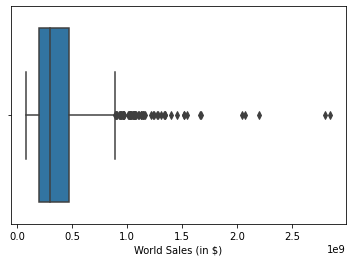

In [62]:
sns.boxplot(data=movie_data, x='World Sales (in $)')

<li> world sales is having outliers towards right side and those are ranging from 2.0 to 3.0 billions.</li>

<AxesSubplot:xlabel='International Sales (in $)'>

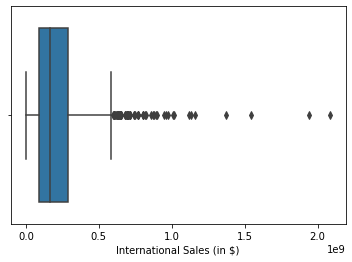

In [63]:
sns.boxplot(data=movie_data, x='International Sales (in $)')

<li> International sales is having outliers towards right side and those are ranging from 1.3 to 2.5 billions.</li>

<AxesSubplot:xlabel='Domestic Sales (in $)'>

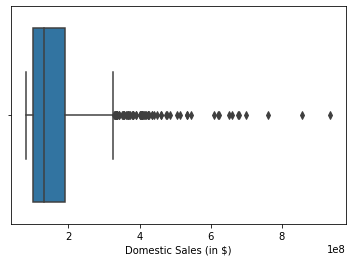

In [64]:
sns.boxplot(data=movie_data, x='Domestic Sales (in $)')

<li> Domestic sales is having outliers towards right side and those are ranging from 550 to 900 Millions.</li>

<AxesSubplot:xlabel='World Sales (in $)', ylabel='Title'>

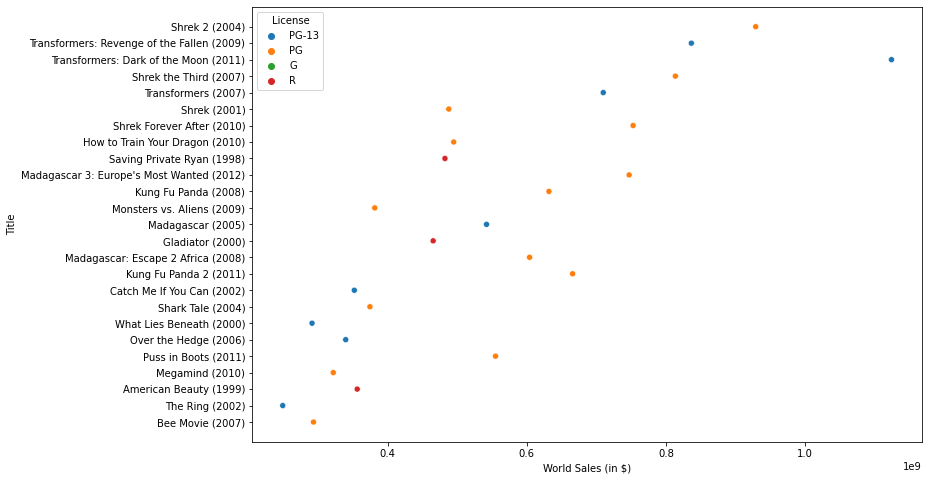

In [134]:
plt.figure(figsize=(12,8))
X=movie_data['Title'][movie_data['Distributor']=='DreamWorks']
sns.scatterplot(data=movie_data, y=X.iloc[0:25], x='World Sales (in $)', hue='License')

<li> The scatterplot shows that for starting 25 movies by DreamWorks Distributors, most of them are PG licensed movies and the heighest sales among them is having for Transformers Dark of the Moon(2011) and it is a PG-13 licensed movies.</li>

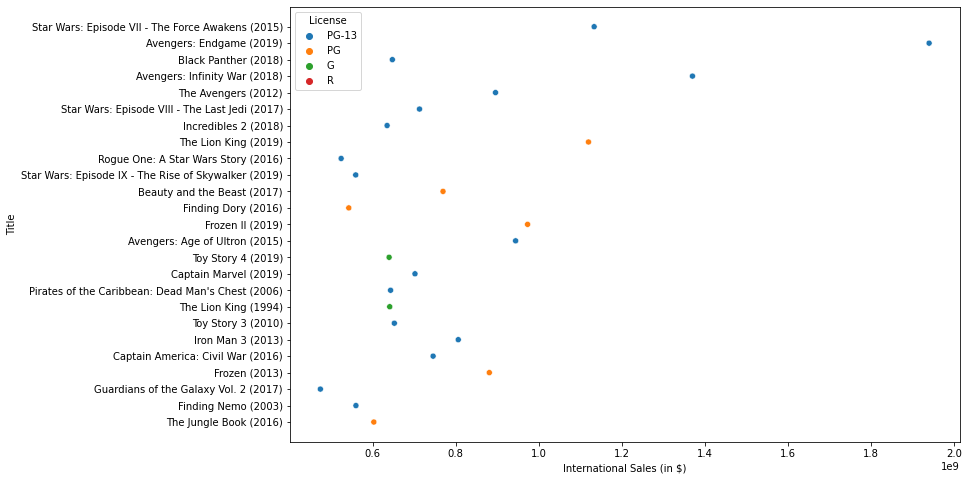

In [143]:
plt.figure(figsize=(12,8))
X=movie_data['Title'][movie_data['Distributor']=='Walt Disney Studios Motion Pictures']
sns.scatterplot(data=movie_data, y=X.iloc[0:25], x='International Sales (in $)', hue='License')
plt.show()

<li> The scatterplot shows that for starting 25 movies by Walt Disney Studios Motion Pictures Distributors, most of them are PG-13 licensed movies and the heighest International sales among them is having for Avengers: Endgame(2019) and it is a PG-13 licensed movies.</li>

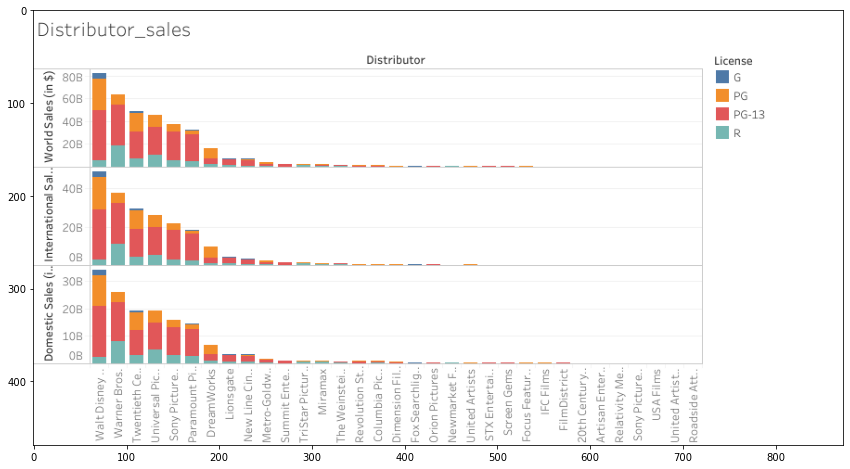

In [66]:
Distributor_plot = plt.imread(r'Distributor_sales.png')
plt.figure(figsize=(18,8))
plt.imshow(Distributor_plot)

<li> the sales of Walt Disney distributor is having heighest sales and the second is warner bros. distributor is having high sales among all.</li>

<AxesSubplot:xlabel='License', ylabel='count'>

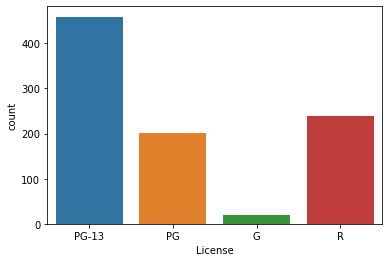

In [69]:
sns.countplot(data=movie_data, x='License')

<li> The above plot shows that the count plot for all the license movies with four different license and they are PG-13, PG, R and G.</li>
<li> The plot shows that PG-13 License movies are having the count of 450 , R license movies are having the count nearer to 250, PG licensed movies are having the count of 200 and last license rated movies is G is having the count of 100 movies.</li> 

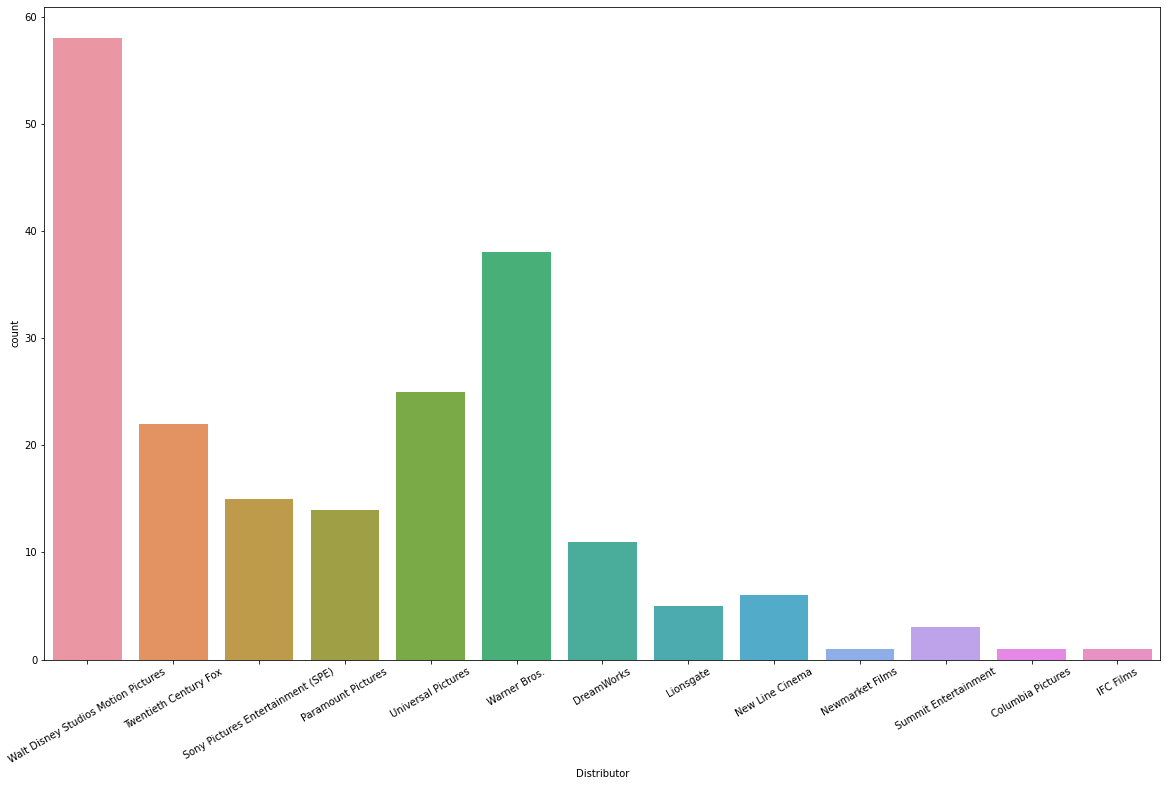

In [133]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data=movie_data, x=movie_data['Distributor'].iloc[0:200])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

<li> The above plot shows that the first 200 movies distributors count.</li>
<li> Here i took first 200 movies distributors, and the heighest count is having 58 for Walt Disney Studios and Warner Bros. is having the second heighest count of 40 among them.</li>

### Conclusion:

<li> From the given movie data there are high sales for walt disney distributor, warner Bros., Twentieth century and Universal pictures</li>
<li> In the year 2021 The spiderman No way Home is having heighest sales by Sony picture Distributor.</li>
<li> In the year 2015 Star wars:Episode VII- the force Awakens by Walt Disney studios Motion pictures is having heighest gross sales</li>
<li>Overall the movie_data Analysis walt Disney Studios Motion Pictures and Warner Bros. Distributed movies are more and Walt Disney Studios Motion Pictures is having high sales.</li>
